In [3]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# loading the data 
historical_energy_data = pd.read_csv(r"C:\Users\HADIJAT OJO\Documents\kaggle\Energy Market Resilience Metrics\historical_energy_data.csv")
infrastructure_data = pd.read_csv(r"C:\Users\HADIJAT OJO\Documents\kaggle\Energy Market Resilience Metrics\infrastructure_data.csv")
market_data = pd.read_csv(r"C:\Users\HADIJAT OJO\Documents\kaggle\Energy Market Resilience Metrics\market_data.csv")
regulatory_data = pd.read_csv(r"C:\Users\HADIJAT OJO\Documents\kaggle\Energy Market Resilience Metrics\regulatory_data.csv")

In [5]:
historical_energy_data.head(2)

,Date/Time,Location/Region,Energy Source,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh)
0,01/01/2012,Region A,Fossil Fuels,24016,21848,0.131630,1564.239198,31604
1,02/01/2012,Region C,Fossil Fuels,56200,34796,0.160969,3837.295411,11734


In [6]:
infrastructure_data.head(2)

,Date/Time,Infrastructure Status,Maintenance Activities,Technology Limitations
0,01/01/2012,Poor,Repairs,High
1,02/01/2012,Poor,Upgrades,High


In [7]:
market_data.head(2)

,Date/Time,Market Price,Competitor Data,Market Trends,Market Demand
0,2012-01-01,0.167891,High,Upward,13518
1,2012-01-02,0.151762,Medium,Upward,2115


In [8]:
regulatory_data.head(2)

,Date/Time,Regulatory Changes,Compliance Status,Compliance Costs
0,2012-01-01,New Regulation,Compliant,3281.685306
1,2012-01-02,Amendment,Non-compliant,2037.272281


### Data Cleaning

In [9]:
date_format = "%d/%m/%Y"

historical_energy_data["Date/Time"] = pd.to_datetime(historical_energy_data["Date/Time"], format= date_format)

new_date_format = "%Y-%m-%d"

historical_energy_data["Date/Time"] = pd.to_datetime(historical_energy_data["Date/Time"], format= new_date_format)

In [10]:
historical_energy_data.head(2)

,Date/Time,Location/Region,Energy Source,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh)
0,2012-01-01,Region A,Fossil Fuels,24016,21848,0.131630,1564.239198,31604
1,2012-01-02,Region C,Fossil Fuels,56200,34796,0.160969,3837.295411,11734


In [11]:
date_format = "%d/%m/%Y"

infrastructure_data["Date/Time"] = pd.to_datetime(infrastructure_data["Date/Time"], format= date_format)

new_date_format = "%Y-%m-%d"

infrastructure_data["Date/Time"] = pd.to_datetime(infrastructure_data["Date/Time"], format= new_date_format)

In [12]:
infrastructure_data.head(2)

,Date/Time,Infrastructure Status,Maintenance Activities,Technology Limitations
0,2012-01-01,Poor,Repairs,High
1,2012-01-02,Poor,Upgrades,High


### Exploratory Data Analysis

In [13]:
# examination on,
# loaction/Region and Energy Source from historical_energy_data
# Infrastructure Status, Maintenance Activities and Technology Limitations from infrastructure_data
# Competitor Data and Market Trends from market_data
# Regulatory Changes and Compliance Status from regulatory_data

# Grouping all datasets as a dictionary
datasets = {
    "historical_energy_data": historical_energy_data,
    "infrastructure_data": infrastructure_data,
    "market_data": market_data,
    "regulatory_data": regulatory_data
}

# Extracting unique values and their counts for categorical columns
categorical_columns = {
    "historical_energy_data": ["Loaction/Region", "Energy Source"],
    "infrastructure_data": ["Infrastructure Status", "Maintenance Activities", "Technology Limitations"],
    "market_data": ["Competitor Data", "Market Trends"],
    "regulatory_data": ["Regulatory Changes", "Compliance Status"]
}

categorical_values_counts = {}
for dataset, columns in categorical_columns.items():
    for column in columns:
        if column in datasets[dataset].columns:
            categorical_values_counts[(dataset, column)] = datasets[dataset][column].value_counts()

# Debugging print
print("Categorical values counts:")
for key, value in categorical_values_counts.items():
    print(f"{key}: {value}")


Categorical values counts:
('historical_energy_data', 'Energy Source'): Energy Source
Fossil Fuels    507
Renewables      493
Name: count, dtype: int64
('infrastructure_data', 'Infrastructure Status'): Infrastructure Status
Poor    641
Fair    322
Good     37
Name: count, dtype: int64
('infrastructure_data', 'Maintenance Activities'): Maintenance Activities
Routine Maintenance    360
Upgrades               327
Repairs                313
Name: count, dtype: int64
('infrastructure_data', 'Technology Limitations'): Technology Limitations
High        776
Moderate    203
Low           8
Name: count, dtype: int64
('market_data', 'Competitor Data'): Competitor Data
Low       351
High      326
Medium    323
Name: count, dtype: int64
('market_data', 'Market Trends'): Market Trends
Upward      343
Downward    329
Stable      328
Name: count, dtype: int64
('regulatory_data', 'Regulatory Changes'): Regulatory Changes
New Regulation    364
Amendment         325
No change         311
Name: count, dt

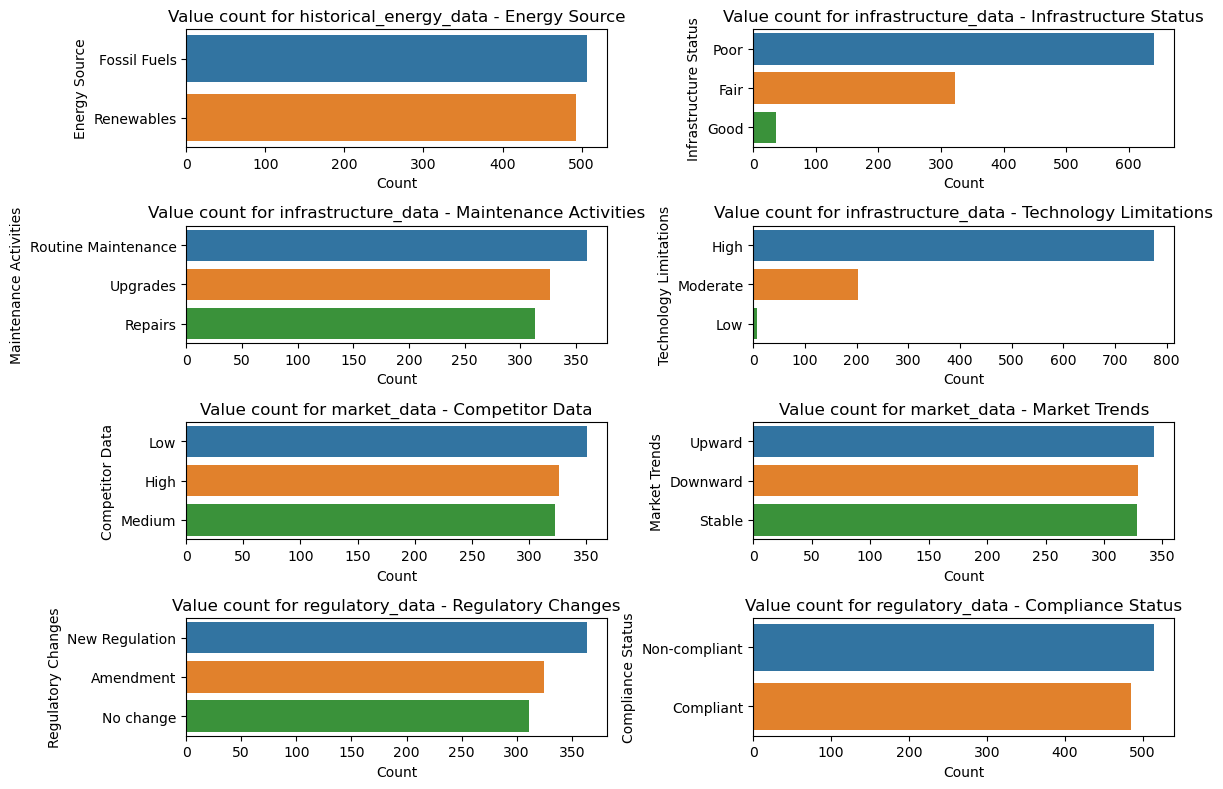

In [14]:
# Visualizing
# Calculating the number of rows and columns for each subplot
num_rows = (len(categorical_values_counts) + 1) // 2
num_cols = 2

# Creating a grid for the subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterating through categorical columns and plotting them into the subplots
for i, ((dataset, column), counts) in enumerate(categorical_values_counts.items()):
    ax = axes[i]
    sns.barplot(x=counts.values, y=counts.index, ax=ax)
    ax.set_title(f"Value count for {dataset} - {column}")
    ax.set_xlabel("Count")
    ax.set_ylabel(column)

# Hiding any remaining subplots
for i in range(len(categorical_values_counts), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

plt.show()

C:\Users\HADIJAT OJO\AppData\Local\Temp\ipykernel_12920\1791121308.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=monthly_data, x=monthly_data.index.astype(str), y="Energy Production (kWh)", label="Energy Production", color="blue", linestyle="-", linewidth=1.5, ci=None)
C:\Users\HADIJAT OJO\AppData\Local\Temp\ipykernel_12920\1791121308.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=monthly_data, x=monthly_data.index.astype(str), y="Energy Consumption (kWh)", label="Energy Consumption", color="red", linestyle="-", linewidth=1.5, ci=None)
C:\Users\HADIJAT OJO\AppData\Local\Temp\ipykernel_12920\1791121308.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=monthly_data, x=monthly_data.index.astype(str), y="Energy Demand", label="Energy Demand", color="green", linestyle="-", line

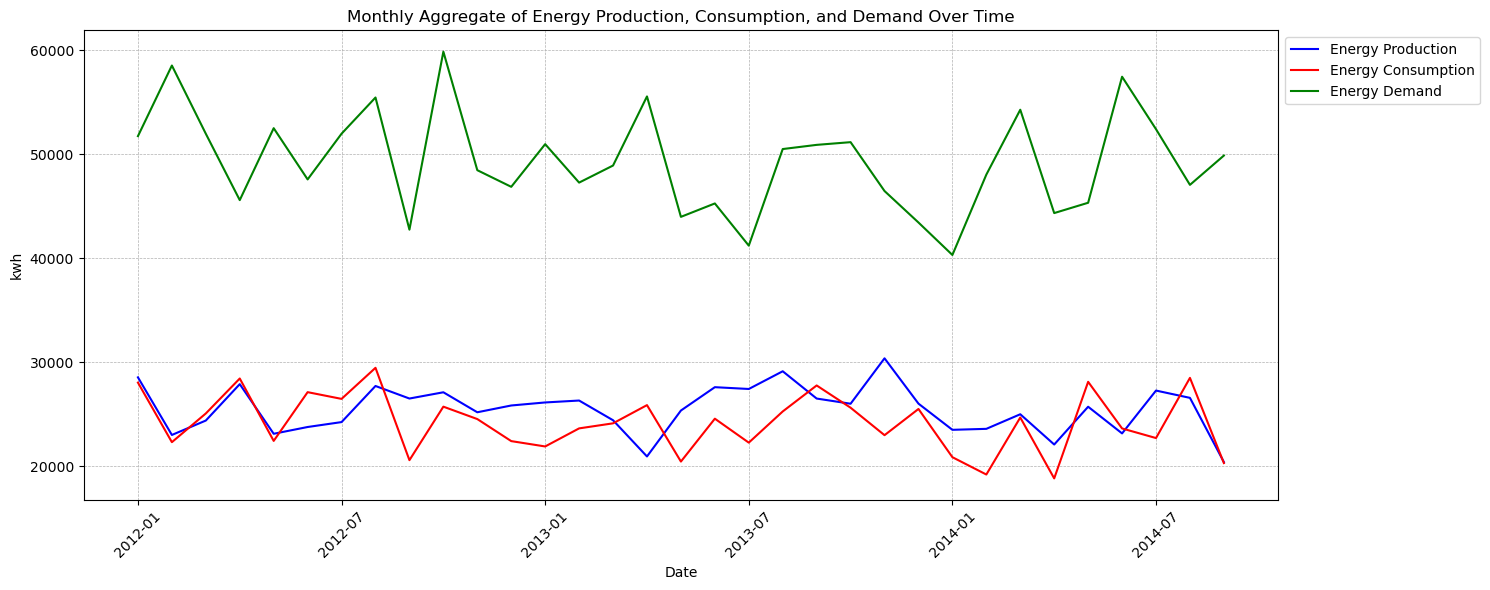

In [15]:
# extract the month and year from the 'Date/Time' column
historical_energy_data["Year"] = historical_energy_data["Date/Time"].dt.year
historical_energy_data["Month"] = historical_energy_data["Date/Time"].dt.month

# creating a new column "year-month" for easy plotting
historical_energy_data["Year-Month"] = historical_energy_data["Date/Time"].dt.to_period("M")

# AGGREGATING DATE ON A MONTH BASIS
numeric_columns = historical_energy_data.select_dtypes(include=[float, int]).columns
monthly_data = historical_energy_data.groupby("Year-Month")[numeric_columns].mean()

# Setting figsize
plt.figure(figsize=(15, 6))

# Plotting
sns.lineplot(data=monthly_data, x=monthly_data.index.astype(str), y="Energy Production (kWh)", label="Energy Production", color="blue", linestyle="-", linewidth=1.5, ci=None)
sns.lineplot(data=monthly_data, x=monthly_data.index.astype(str), y="Energy Consumption (kWh)", label="Energy Consumption", color="red", linestyle="-", linewidth=1.5, ci=None)
sns.lineplot(data=monthly_data, x=monthly_data.index.astype(str), y="Energy Demand", label="Energy Demand", color="green", linestyle="-", linewidth=1.5, ci=None)

# Setting the title and labels
plt.title("Monthly Aggregate of Energy Production, Consumption, and Demand Over Time")
plt.xlabel("Date")
plt.ylabel("kwh")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Getting our labels
labels = monthly_data.index.astype(str).tolist()
n = 6
plt.xticks(labels[::n], rotation=45)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

plt.show()

### market price and energy price over time

Column names in monthly_merged_data: Index(['Energy Demand', 'Energy Consumption (kWh)', 'Energy Price',
       'Operational Costs', 'Energy Production (kWh)', 'Year', 'Month',
       'Market Price', 'Market Demand', 'Year-Month'],
      dtype='object')
First few rows of monthly_merged_data:
             Energy Demand  Energy Consumption (kWh)  Energy Price  \
Year-Month                                                          
2012-01      51746.612903              28030.741935      0.135257   
2012-02      58542.068966              22298.310345      0.131823   
2012-03      51976.903226              25060.096774      0.129830   
2012-04      45590.000000              28423.733333      0.133459   
2012-05      52512.258065              22419.709677      0.135185   

            Operational Costs  Energy Production (kWh)    Year  Month  \
Year-Month                                                              
2012-01           3171.837291             28536.064516  2012.0    1.0   
201

C:\Users\HADIJAT OJO\AppData\Local\Temp\ipykernel_12920\3362988875.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=monthly_merged_data, x="Year-Month", y="Market Price", label="Market Price", color="blue", linestyle="-", linewidth=1.5, ci=None)
C:\Users\HADIJAT OJO\AppData\Local\Temp\ipykernel_12920\3362988875.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=monthly_merged_data, x="Year-Month", y="Energy Price", label="Energy Price", color="red", linestyle="-", linewidth=1.5, ci=None)


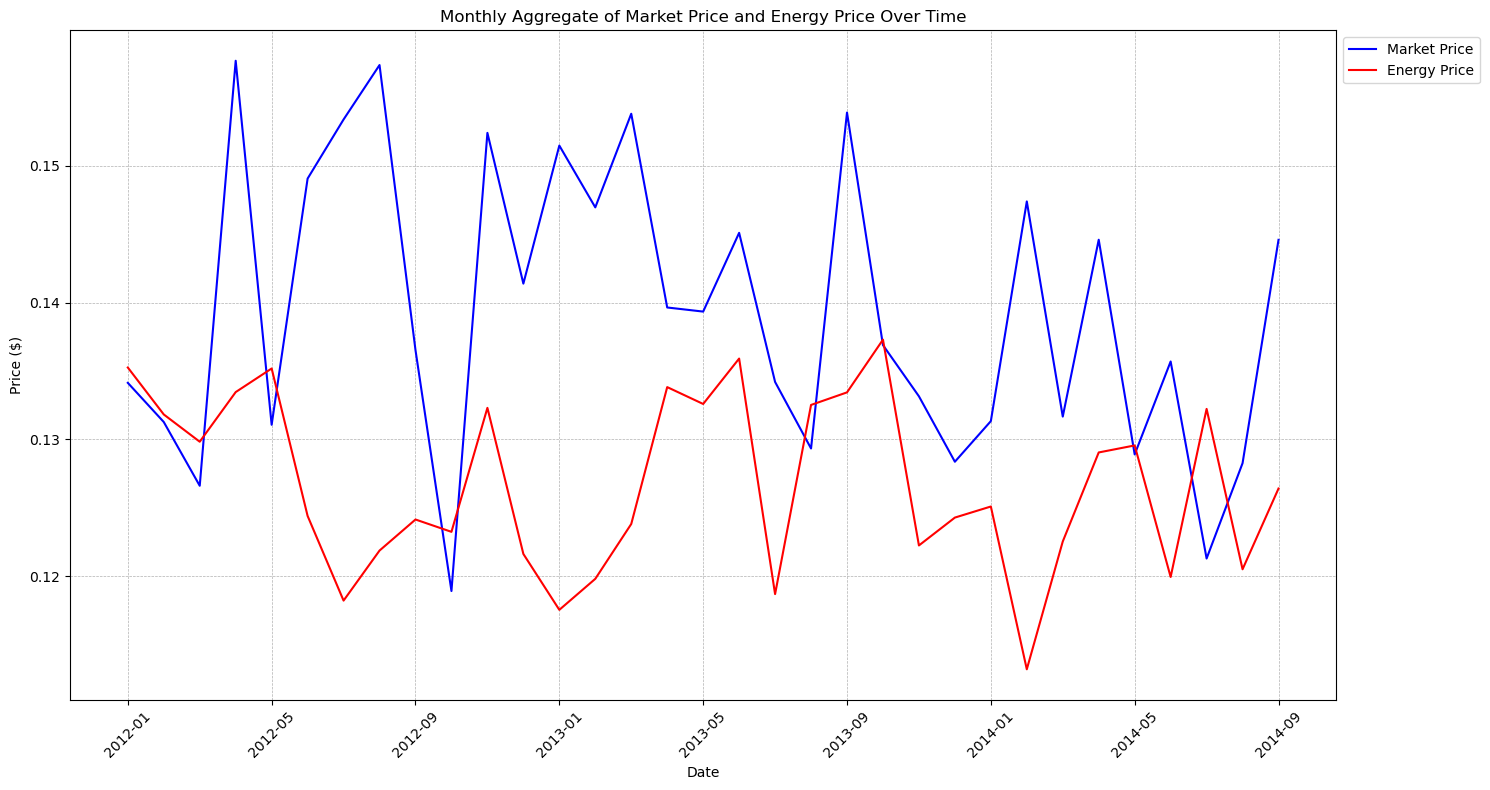

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure both Date/Time columns are datetime64[ns] type
historical_energy_data["Date/Time"] = pd.to_datetime(historical_energy_data["Date/Time"])
market_data["Date/Time"] = pd.to_datetime(market_data["Date/Time"])

# Merging historical_energy_data and market_data on "Date/Time" for combined analysis
merged_data = pd.merge(historical_energy_data, market_data, on="Date/Time", how="inner")

# Creating a new Year-Month column for aggregation
merged_data["Year-Month"] = merged_data["Date/Time"].dt.to_period("M")

# Exclude non-numeric columns before aggregation
numeric_columns = merged_data.select_dtypes(include=['number']).columns

# Aggregating data on a monthly basis
monthly_merged_data = merged_data.groupby("Year-Month")[numeric_columns].mean()

# Converting Year-Month to string for plotting
monthly_merged_data["Year-Month"] = monthly_merged_data.index.astype(str)

# Debugging: Print column names and sample data to ensure they are correct
print("Column names in monthly_merged_data:", monthly_merged_data.columns)
print("First few rows of monthly_merged_data:\n", monthly_merged_data.head())

plt.figure(figsize=(15, 8))

# Ensure column names are correctly referenced in the plotting function
if "Market Price" in monthly_merged_data.columns and "Energy Price" in monthly_merged_data.columns:
    sns.lineplot(data=monthly_merged_data, x="Year-Month", y="Market Price", label="Market Price", color="blue", linestyle="-", linewidth=1.5, ci=None)
    sns.lineplot(data=monthly_merged_data, x="Year-Month", y="Energy Price", label="Energy Price", color="red", linestyle="-", linewidth=1.5, ci=None)

    # Setting the title and labels
    plt.title("Monthly Aggregate of Market Price and Energy Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Price ($)")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)

    # Getting our labels
    labels = monthly_merged_data["Year-Month"].tolist()
    n = 4
    plt.xticks(labels[::n], rotation=45)

    plt.tight_layout()

    plt.show()
else:
    print("Market Price or Energy Price columns not found in the DataFrame.")


### Energy Demand and Energy Price correlation

In [17]:
# merging historical_energy_data and market_data on "Date/Time" 
merged_data= pd.merge(historical_energy_data, market_data, on="Date/Time", how="inner")

correlation_energy_price = merged_data["Energy Demand"].corr(merged_data["Energy Price"])
correlation_market_price = merged_data["Market Demand"].corr(merged_data["Market Price"])

In [18]:
correlation_energy_price

-0.005361840768503358

In [19]:
correlation_market_price

0.02980230214828854

### infrastructure status and technological limitations

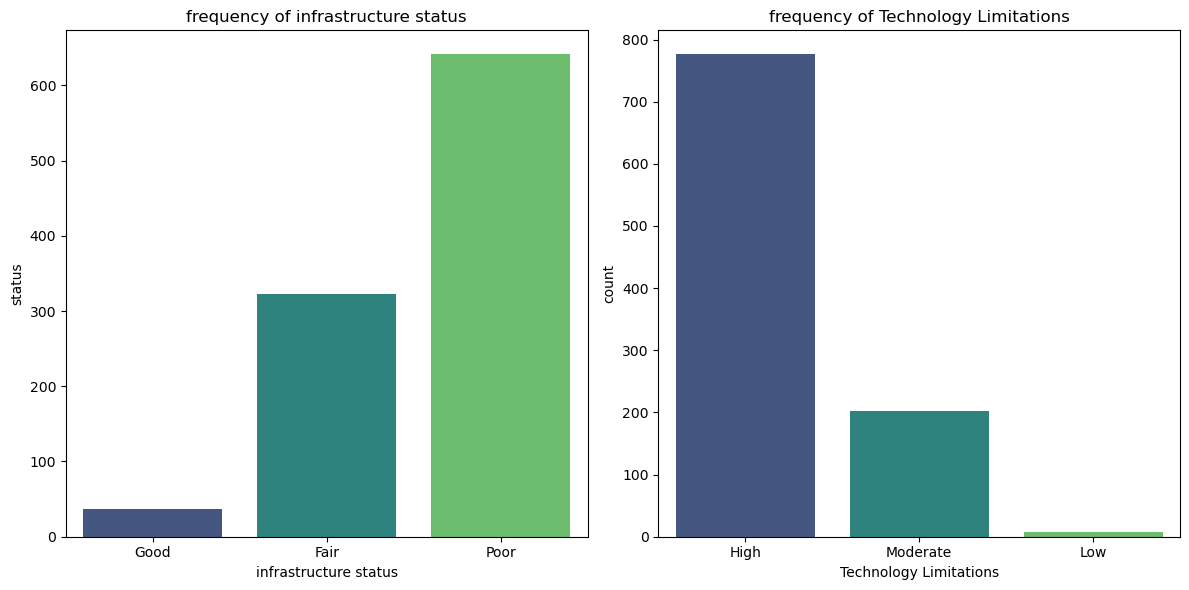

In [20]:
# setting the figure and axes
fig, axes = plt.subplots(1,2, figsize=(12,6))

# plotting the frequency of infrastructure status
sns.countplot(data=infrastructure_data, x="Infrastructure Status", ax=axes[0],order=["Good","Fair","Poor"],palette="viridis")
axes[0].set_title("frequency of infrastructure status")
axes[0].set_xlabel("infrastructure status")
axes[0].set_ylabel("status")

# plotting the frequency of technology limitations
sns.countplot(data=infrastructure_data, x="Technology Limitations", ax=axes[1],palette="viridis")
axes[1].set_title("frequency of Technology Limitations")
axes[1].set_xlabel("Technology Limitations")
axes[1].set_ylabel("count")

plt.tight_layout()
plt.show()

### checking the relationship to show the relationship with infrastructure status and technology limitations

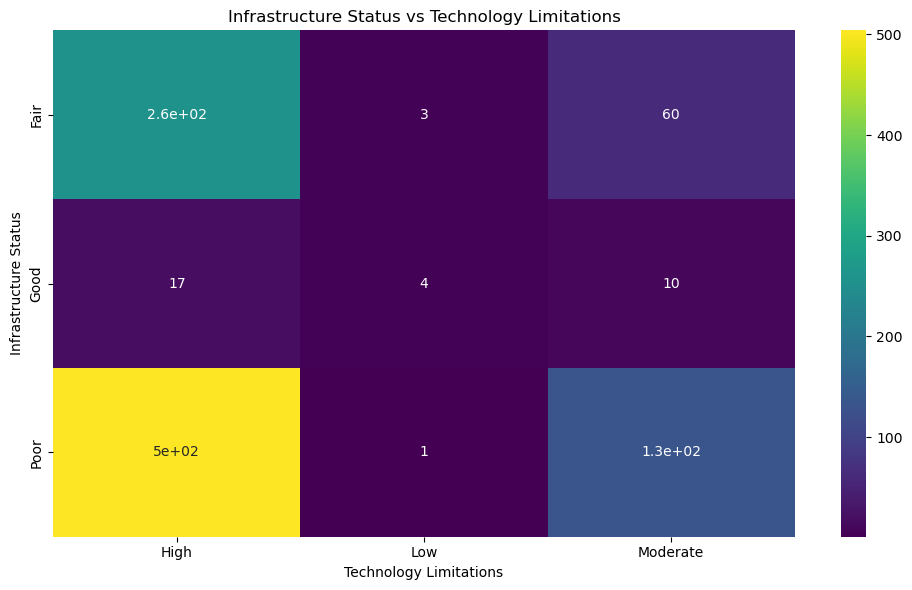

In [21]:
ct = pd.crosstab(infrastructure_data["Infrastructure Status"], infrastructure_data["Technology Limitations"])

plt.figure(figsize=(10,6))

sns.heatmap(ct, annot=True, cmap="viridis")
plt.title("Infrastructure Status vs Technology Limitations")
plt.xlabel("Technology Limitations")
plt.ylabel("Infrastructure Status")


plt.tight_layout()

plt.show()

### correlation between poor infrastructure status and high technology limitation and the energy production

In [22]:
infrastructure_data["Poor_Infrastructure"]= infrastructure_data["Infrastructure Status"].apply(
    lambda x: 1 if x == "Poor" else 0)
infrastructure_data["High_Technology_Limitations"]= infrastructure_data["Technology Limitations"].apply(
    lambda x: 1 if x == "High" else 0)

infrastructure_data["Combined"] = infrastructure_data["Poor_Infrastructure"]*infrastructure_data["High_Technology_Limitations"]

merged_data= pd.merge(historical_energy_data, infrastructure_data, on="Date/Time", how="inner")

correlation_coefficient = merged_data["Energy Production (kWh)"].corr(merged_data["Combined"])

In [23]:
correlation_coefficient

-0.015877155348918308

### regulatory changes and compliance costs

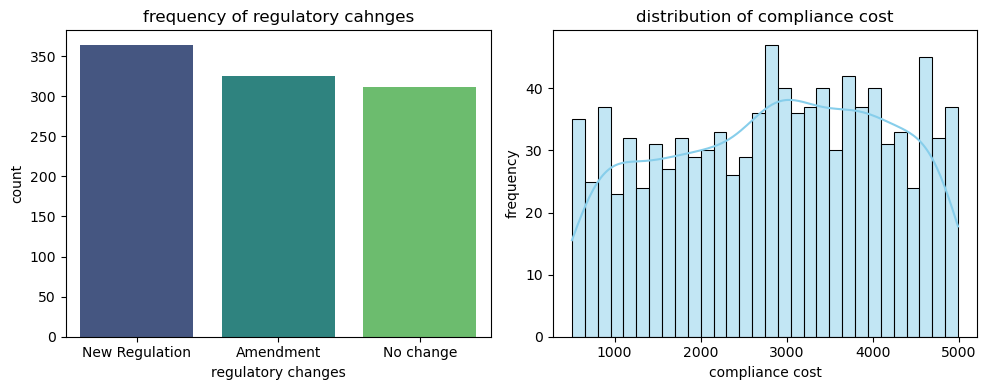

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

sns.countplot(data=regulatory_data, x="Regulatory Changes",ax=ax1, palette="viridis")
ax1.set_title("frequency of regulatory cahnges")
ax1.set_xlabel("regulatory changes")
ax1.set_ylabel("count")

sns.histplot(data=regulatory_data, x="Compliance Costs", ax=ax2, bins=30, kde=True, color="skyblue")
ax2.set_title("distribution of compliance cost")
ax2.set_xlabel("compliance cost")
ax2.set_ylabel("frequency")

plt.tight_layout()
plt.show()

### impact of regulatory cahnges and operational costs on revenue

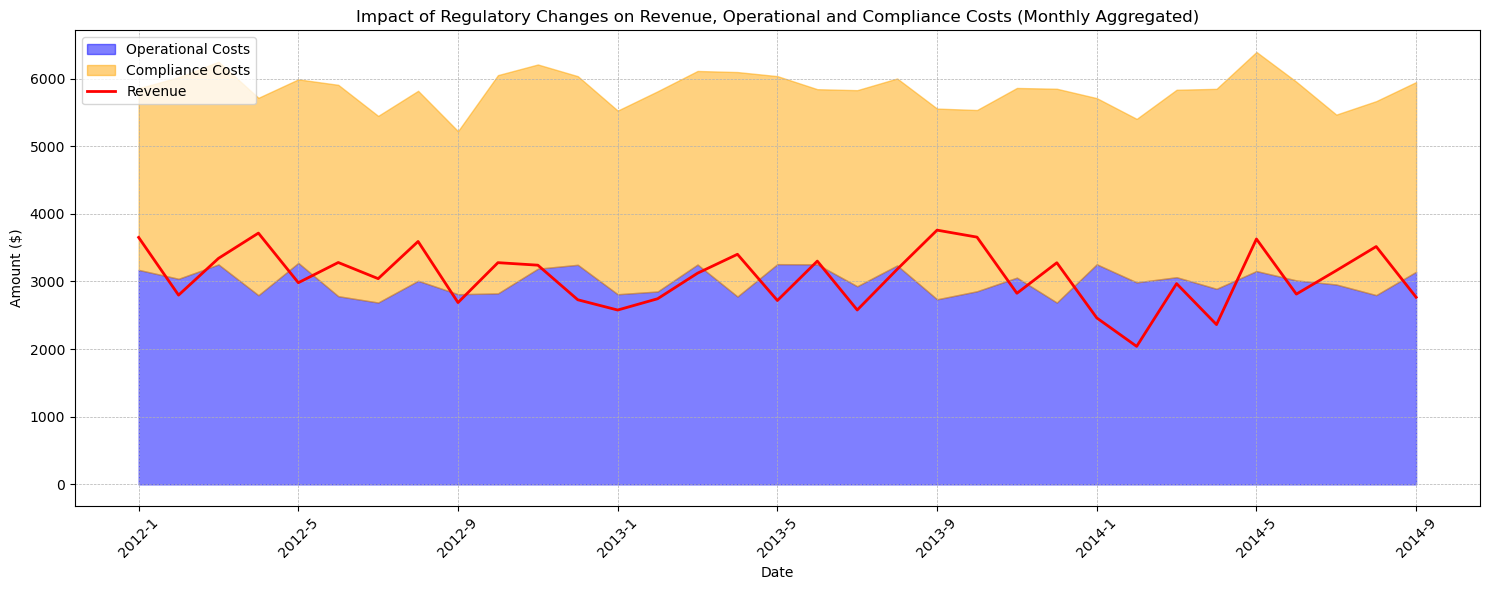

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Date/Time' columns are in datetime format
historical_energy_data["Date/Time"] = pd.to_datetime(historical_energy_data["Date/Time"])
regulatory_data["Date/Time"] = pd.to_datetime(regulatory_data["Date/Time"])

# Calculate Revenue based on Energy Price and Energy Consumption
historical_energy_data["Revenue"] = historical_energy_data["Energy Price"] * historical_energy_data["Energy Consumption (kWh)"]

# Merge historical_energy_data and regulatory_data on "Date/Time"
merged_regulatory_data = pd.merge(historical_energy_data, regulatory_data, on="Date/Time", how="inner")

# Extract Year and Month from Date/Time
merged_regulatory_data["Year"] = merged_regulatory_data["Date/Time"].dt.year
merged_regulatory_data["Month"] = merged_regulatory_data["Date/Time"].dt.month

# Group by Year and Month, then calculate mean for numeric columns
monthly_aggregated_data = merged_regulatory_data.groupby(["Year", "Month"]).mean(numeric_only=True).reset_index()

# Create a Year-Month column for better x-axis labeling
monthly_aggregated_data["Year-Month"] = monthly_aggregated_data["Year"].astype(str) + "-" + monthly_aggregated_data["Month"].astype(str)

# Plotting
plt.figure(figsize=(15, 6))

# Plotting operational costs as a filled area
plt.fill_between(monthly_aggregated_data["Year-Month"], monthly_aggregated_data["Operational Costs"], 
                 color="blue", label="Operational Costs", alpha=0.5)

# Adding compliance costs as a stacked area plot
plt.fill_between(monthly_aggregated_data["Year-Month"], monthly_aggregated_data["Operational Costs"], 
                 monthly_aggregated_data["Operational Costs"] + monthly_aggregated_data["Compliance Costs"], 
                 color="orange", label="Compliance Costs", alpha=0.5)

# Plotting revenue as a line plot
sns.lineplot(data=monthly_aggregated_data, x="Year-Month", y="Revenue", label="Revenue", color="red", linewidth=2)

# Formatting plot
plt.title("Impact of Regulatory Changes on Revenue, Operational and Compliance Costs (Monthly Aggregated)")
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.legend(loc="upper left")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
labels = monthly_aggregated_data["Year-Month"].tolist()
n = 4
plt.xticks(labels[::n], rotation=45)

plt.tight_layout()
plt.show()


### analysing competition from renewable energy providers

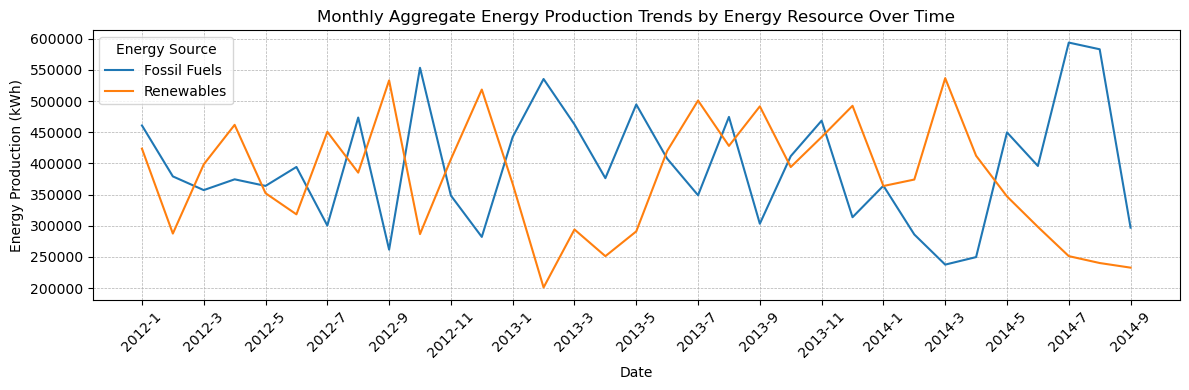

In [31]:

# Create Year and Month columns
historical_energy_data["Year"] = historical_energy_data["Date/Time"].dt.year
historical_energy_data["Month"] = historical_energy_data["Date/Time"].dt.month

# Aggregate the energy production by Year, Month, and Energy Source
numeric_cols = ["Energy Production (kWh)"]  # List only the numeric columns to aggregate
monthly_aggregated_data = historical_energy_data.groupby(["Year", "Month", "Energy Source"])[numeric_cols].sum().reset_index()

# Create a Year-Month column
monthly_aggregated_data["Year-Month"] = monthly_aggregated_data["Year"].astype(str) + "-" + monthly_aggregated_data["Month"].astype(str)

# Plotting
plt.figure(figsize=(12, 4))
sns.lineplot(data=monthly_aggregated_data, x="Year-Month", y="Energy Production (kWh)", hue="Energy Source")

plt.title("Monthly Aggregate Energy Production Trends by Energy Resource Over Time")
plt.xlabel("Date")
plt.ylabel("Energy Production (kWh)")
plt.legend(title="Energy Source")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Adjust x-axis labels for better readability
labels = monthly_aggregated_data["Year-Month"].tolist()
n = 4
plt.xticks(labels[::n], rotation=45)

plt.tight_layout()
plt.show()
